In [63]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [72]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩

train_x = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/mini2/train_x.csv", encoding = 'utf8')
test_x = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/mini2/test_x.csv", encoding = 'utf8')
train_y = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/mini2/train_y.csv", encoding = 'utf8')
test_y = pd.read_csv("C:/Users/admin/Desktop/에이블 실습/mini2/test_y.csv", encoding = 'utf8')


---

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [73]:
train_x.drop('time', axis = 1, inplace = True)
test_x.drop('time', axis = 1, inplace = True)
train_y.drop('time', axis = 1, inplace = True)
test_y.drop('time', axis = 1, inplace = True)


In [74]:
# LinearRegression 코드를 작성하세요.
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [75]:
# predict로 예측하여 y_pred_LR에 저장해보세요.

y_pred_LR = model.predict(test_x)

In [76]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print(r2_score(test_y, y_pred_LR))
print(mse(test_y, y_pred_LR))


0.9305126500435672
38.28802273576271


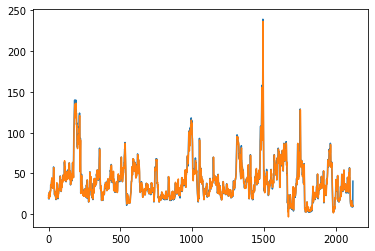

In [77]:
import matplotlib.pyplot as plt
plt.plot(test_y.values, label='Actual')
plt.plot(y_pred_LR, label='Predicted')

In [61]:
# 학습한 모델을 pkl 파일로 저장해보세요.




TypeError: 'DataFrame' object is not callable

# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [78]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
train_y2 = np.ravel(train_y)
model = RFR()

In [79]:
# Test 데이터로 성능을 평가해보세요.

model.fit(train_x, train_y2)
y_pred = model.predict(test_x)

print(r2_score(test_y, y_pred))
print(mse(test_y, y_pred))

0.9259568065479029
40.798324818831645


In [ ]:
# 학습한 모델을 파일로 저장해보세요.


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from c

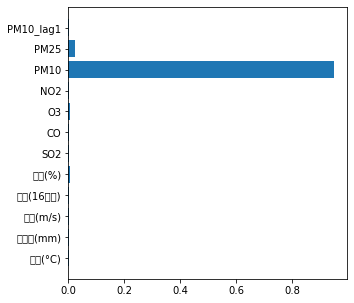

In [58]:
# (다음 진행은 선택입니다)
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

x = train_x.columns
plt.figure(figsize = (5,5))
plt.barh(x, model.feature_importances_)
plt.show()

In [ ]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.



In [ ]:
# Test 데이터로 성능을 평가해보세요.




In [ ]:
# 학습한 모델을 파일로 저장해보세요.




In [ ]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인




In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.




In [ ]:
# Test 데이터로 성능을 평가해보세요.




In [ ]:
# 학습한 모델을 파일로 저장해보세요.




In [ ]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [ ]:
# Feature의 중요도 확인





In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

